In [1]:
import matplotlib.pyplot as plt
import numpy as np
import nibabel as nib

In [2]:
from designer.fitting.dwipy import DWI

In [3]:
from dipy.reconst.dki import DiffusionKurtosisModel
from dipy.core.gradients import gradient_table

In [4]:
import dipy.data as dpd

In [5]:
bvals = np.array([   0., 1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000.,
       1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000.,
       1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000.,
       1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000.,
       1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000.,
       1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000.,
       1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000.,
       1000., 1000., 2000., 2000., 2000., 2000., 2000., 2000., 2000.,
       2000., 2000., 2000., 2000., 2000., 2000., 2000., 2000., 2000.,
       2000., 2000., 2000., 2000., 2000., 2000., 2000., 2000., 2000.,
       2000., 2000., 2000., 2000., 2000., 2000., 2000., 2000., 2000.,
       2000., 2000., 2000., 2000., 2000., 2000., 2000., 2000., 2000.,
       2000., 2000., 2000., 2000., 2000., 2000., 2000., 2000., 2000.,
       2000., 2000., 2000., 2000., 2000., 2000., 2000., 2000., 2000.,
       2000., 2000., 2000.])

In [6]:
bvecs = np.array([
       [ 0.        ,  0.        ,  0.        ],
       [ 0.99950679, -0.01406001,  0.02808002],
       [-0.01463576, -0.97998415, -0.19853679],
       [-0.00959396, -0.49549783, -0.86855619],
       [ 0.61006182,  0.78898752, -0.0729607 ],
       [-0.19831153,  0.6800121 , -0.70587256],
       [-0.87615451,  0.34688258, -0.33470249],
       [ 0.81751398, -0.04166   , -0.57439998],
       [ 0.24057871, -0.86383536, -0.44261762],
       [ 0.9454818 , -0.09464018, -0.31162059],
       [ 0.50879617,  0.79398338,  0.33274142],
       [ 0.34248559,  0.76129465,  0.55057613],
       [ 0.44538916,  0.50824133,  0.73710192],
       [-0.45589708,  0.53220336, -0.7133845 ],
       [-0.61255515, -0.58510267, -0.53144242],
       [-0.60375129, -0.0233797 ,  0.79682982],
       [-0.81036054,  0.57000108, -0.13570026],
       [ 0.87992177, -0.05131987,  0.4723388 ],
       [ 0.26744338,  0.38314198,  0.88412457],
       [ 0.11942661,  0.89558458,  0.42856219],
       [-0.8211354 , -0.46935623,  0.32471739],
       [ 0.50570362, -0.80690259, -0.30524098],
       [-0.81230286, -0.24873781,  0.52753536],
       [ 0.95939187,  0.25232102, -0.12610051],
       [ 0.23996047, -0.6751557 , -0.69755556],
       [-0.05012948,  0.01363986,  0.99864958],
       [ 0.24099032,  0.97050934,  0.00594006],
       [ 0.78940883,  0.61334375, -0.02536016],
       [-0.13595461, -0.16052072, -0.97762439],
       [-0.1808058 , -0.85148965,  0.49221402],
       [ 0.88512056, -0.39918025, -0.23920015],
       [-0.59252898, -0.37336037,  0.7138007 ],
       [-0.35392258,  0.04108053, -0.93437209],
       [-0.33307214,  0.02948001,  0.94244039],
       [-0.29826373,  0.31466183, -0.90112523],
       [-0.95528451,  0.29538077, -0.01348004],
       [-0.95672728, -0.14984051, -0.24944085],
       [ 0.46778837,  0.87570819,  0.11962112],
       [-0.77862641, -0.58855774, -0.21757917],
       [ 0.72044321, -0.31708141, -0.61678275],
       [-0.67119619,  0.12146022, -0.7312613 ],
       [ 0.65497087, -0.63277118,  0.41305424],
       [-0.10984162,  0.85031258, -0.51468761],
       [-0.727808  , -0.26606219, -0.63206521],
       [-0.09468971, -0.69533786, -0.7124178 ],
       [ 0.61095072,  0.70126312, -0.36738163],
       [-0.04653838,  0.54872452, -0.83470688],
       [-0.53021829,  0.84402333, -0.08058032],
       [ 0.83207915,  0.36554138,  0.41716158],
       [ 0.39903954,  0.71102986, -0.57896803],
       [-0.22413097, -0.58425211,  0.78000947],
       [-0.70878551,  0.69396344,  0.12664063],
       [ 0.39973327, -0.80683046,  0.43501485],
       [ 0.51291405, -0.5796378 , -0.6331976 ],
       [-0.19916841,  0.32924068,  0.92300191],
       [ 0.4891573 , -0.27008182, -0.8293256 ],
       [ 0.41296413,  0.87670876, -0.24666247],
       [-0.68290345,  0.39578188, -0.61400292],
       [ 0.2323329 , -0.95200732,  0.19925735],
       [-0.04269745, -0.28683629,  0.95702762],
       [ 0.06627216,  0.97234237, -0.22396054],
       [ 0.54278281,  0.1358392 ,  0.82881513],
       [-0.3236224 , -0.33029429,  0.88666466],
       [ 0.72524814, -0.54944314, -0.41488237],
       [ 0.24958661, -0.96252234, -0.10610026],
       [ 0.99928148, -0.01603999,  0.03433998],
       [-0.01306608, -0.97610608, -0.21690135],
       [-0.00676401, -0.47714053, -0.87880098],
       [ 0.60924374,  0.79091004, -0.05730073],
       [-0.19753138,  0.69131182, -0.69503188],
       [-0.87516878,  0.35104111, -0.33294106],
       [ 0.81783918, -0.02450022, -0.57492505],
       [ 0.23143263, -0.86338235, -0.44834122],
       [ 0.94620078, -0.09826008, -0.30830025],
       [ 0.50952481,  0.78708434,  0.34768192],
       [ 0.34147451,  0.75220553,  0.56354414],
       [ 0.44089436,  0.49865588,  0.74629383],
       [-0.45315742,  0.54384914, -0.70631187],
       [-0.61057568, -0.57010602, -0.5497058 ],
       [-0.60744809, -0.03942003,  0.79338067],
       [-0.80970101,  0.57190114, -0.13158026],
       [ 0.87679071, -0.06183991,  0.4768793 ],
       [ 0.26728485,  0.38053837,  0.8852962 ],
       [ 0.120057  ,  0.89894746,  0.4212835 ],
       [-0.82212938, -0.46537512,  0.32791656],
       [ 0.50793244, -0.80600069, -0.30392026],
       [-0.81402747, -0.24677754,  0.52579475],
       [ 0.95955889,  0.25116128, -0.12714065],
       [ 0.24298114, -0.67180316, -0.69974329],
       [-0.05551178,  0.00661997,  0.99843609],
       [ 0.23720936,  0.97145739, -0.0015    ],
       [ 0.78797341,  0.61434266, -0.04100018],
       [-0.13033229, -0.17876039, -0.97522214],
       [-0.18218867, -0.84165384,  0.50835628],
       [ 0.88850599, -0.39656089, -0.23086052],
       [-0.59435222, -0.36957678,  0.71425377],
       [-0.34990227,  0.03408022, -0.93616608],
       [-0.33709749,  0.03101995,  0.94095858],
       [-0.29558944,  0.31242152, -0.9027844 ],
       [-0.95666803,  0.29036062, -0.02184005],
       [-0.9542435 , -0.15196056, -0.25754094],
       [ 0.46674376,  0.87666707,  0.11664094],
       [-0.77740843, -0.58887836, -0.22103938],
       [ 0.72445236, -0.31836192, -0.61140368],
       [-0.66807838,  0.11412116, -0.73528746],
       [ 0.65440021, -0.62593829,  0.42421884],
       [-0.10648469,  0.83666539, -0.53726346],
       [-0.7262587 , -0.27786088, -0.62876199],
       [-0.09476853, -0.71784398, -0.68972382],
       [ 0.61213669,  0.67404516, -0.41346317],
       [-0.04772428,  0.49646289, -0.86674505],
       [-0.52977472,  0.83754651, -0.13362104],
       [ 0.83345109,  0.38768051,  0.39378052],
       [ 0.39738614,  0.67403041, -0.62270962],
       [-0.22149397, -0.53821021,  0.81318521],
       [-0.7077622 ,  0.70098099,  0.08774012],
       [ 0.40125413, -0.78977237,  0.46395552],
       [ 0.50603877, -0.58891856, -0.63015846],
       [-0.18804978,  0.34073961,  0.92115894],
       [ 0.47928505, -0.27666407, -0.83291226],
       [ 0.40921211,  0.87578452, -0.25602132],
       [-0.69060318,  0.38782055, -0.61046087],
       [ 0.23397643, -0.94853365,  0.21339857],
       [-0.03137969, -0.26827735,  0.9628305 ],
       [ 0.06668652,  0.96696749, -0.24602191],
       [ 0.55434321,  0.14239928,  0.82001588],
       [-0.30978583, -0.31525982,  0.8970195 ],
       [ 0.71812171, -0.55954133, -0.41378099],
       [ 0.24586967, -0.96601086, -0.07981925]])


In [7]:
gtab = gradient_table(bvals, bvecs)

In [8]:
np.savetxt('dwi.bvals', bvals)
np.savetxt('dwi.bvecs', bvecs.T)

In [9]:
# from dipy.data import get_3shell_gtab, read_sherbrooke_3shell

In [10]:
# gtab = get_3shell_gtab()

In [11]:
# sgtab.bvals

In [12]:
#fdata, fbval, fbvec = dpd.get_fnames("sherbrooke_3shell")

In [13]:
dkim = DiffusionKurtosisModel(gtab)

In [14]:
from dipy.sims.voxel import single_tensor
from dipy.sims.voxel import multi_tensor_dki, multi_tensor, dki_signal

In [15]:
dki_signal

<function dipy.sims.voxel.dki_signal(gtab, dt, kt, S0=150, snr=None)>

In [16]:
mevals = np.array([[0.0015, 0.001, 0.001], 
                   [0.001, 0.00015, 0.00015]])

In [17]:
n_sims = 1000
sim = np.zeros((n_sims, gtab.bvals.shape[0]))

In [18]:
signal_fx, dt_fx, kt_fx = multi_tensor_dki(gtab, snr=5, mevals=mevals)

In [19]:
for nn in range(n_sims):
    sim[nn] = dki_signal(gtab, dt_fx, kt_fx, snr=20)

In [20]:
gtab.bvals.shape

(129,)

In [21]:
nib.save(nib.Nifti1Image(sim.reshape((10, 10, 10, gtab.bvals.shape[0])), np.eye(4)), "sim.nii.gz")

In [22]:
my_dwi = DWI("sim.nii.gz", bvecPath='dwi.bvecs', bvalPath='dwi.bvals')

No brain mask supplied
Image sim.nii.nii loaded successfully
Processing with 8 workers...


In [23]:
my_dwi.fit()

Unconstrained Tensor Fit: [100%]


In [24]:
md, rd, ad, fa, fe, trace  = my_dwi.extractDTI()

DTI Parameters: [100%]


In [25]:
mk, rk, ak, kfa, mkt, trace = my_dwi.extractDKI()

DKI Parameters: [100%]


(array([  1.,   1.,   1.,   6.,  11.,  43.,  74., 274., 474., 115.]),
 array([-0.70003707, -0.5137809 , -0.32752473, -0.14126856,  0.04498761,
         0.23124379,  0.41749996,  0.60375613,  0.7900123 ,  0.97626847,
         1.16252465]),
 <BarContainer object of 10 artists>)

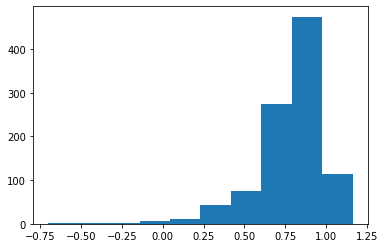

In [26]:
plt.hist(mk.ravel())

In [27]:
dkif = dkim.fit(sim.reshape((10, 10, 10, gtab.bvals.shape[0])))

In [28]:
sim_mk = dkif.mk(-3, 3)

In [29]:
np.corrcoef(sim_mk.ravel(), mk.ravel())

array([[1.        , 0.99999763],
       [0.99999763, 1.        ]])

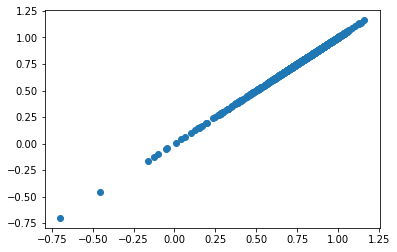

In [30]:
plt.scatter(sim_mk.ravel(), mk.ravel())

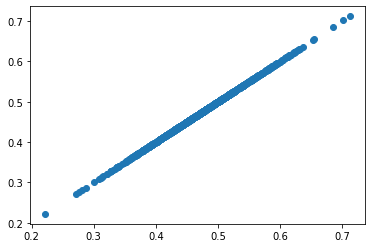

In [32]:
plt.scatter(dkif.fa.ravel(), fa.ravel())